# Time Series Stationarity

## What is Stationarity?

A time series is stationary if it does not exhibit any long term trends or obvious seasonality. 

It has:

- A constant variance through time
- A constant mean through time
- The statistical properties of the time series do not change

## Visualise Data

(Data sourced from [Kaggle](https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis) with a CC0 licence)

In [2]:
# Import packages
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# Read in the data
data = pd.read_csv('/Users/nicolaigarderhansen/Desktop/AirPassengers.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


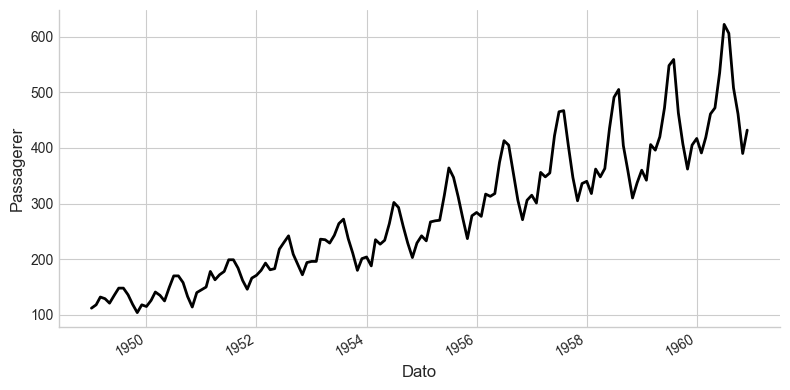

In [4]:
def plot_airline_passengers(
    df,
    title="",
    x_col="Month",
    y_col="#Passengers",
    x_label="Dato",
    y_label="Passagerer",
    trend_window=12   # glidende middel over én sæson
):
    """Line chart + trend for AirPassengers‐lignende data."""
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    # --- beregn trend -------------------------------------------------------
    df["trend"] = (
        df[y_col]
        .rolling(window=trend_window, center=True)
        .mean()
    )

    # --- plot ---------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 4))

    # hovedserie i sort
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    # trendlinje (stiplet, defaultfarve)
    # ax.plot(
    #     df[x_col],
    #     df["trend"],
    #     linestyle="--",
    #     lw=2,
    #     label=f"{trend_window}-måneders trend"
    # )

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    ax.legend()
    fig.tight_layout()
    plt.show()

plot_airline_passengers(data)


Is this time series stationary? No.

There is a clear increasing trend and the variance of fluctuations are also increasing in time.

To make the time series stationary, we need apply transformations to it.

## Differencing

The most common transformation is differencing.

Where d(t) is the difference at time t between the series at points y(t) and y(t-1).


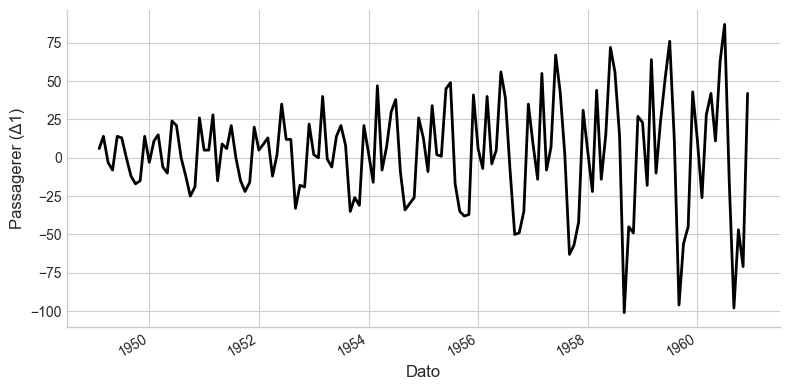

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# --- beregn 1. differens ----------------------------------------------------
data["Passenger_Diff"] = data["#Passengers"].diff()

# --- plotfunktion ----------------------------------------------------------
def plot_passenger_diff(df,
                        x_col="Month",
                        y_col="Passenger_Diff",
                        title="",
                        x_label="Dato",
                        y_label="Passagerer (Δ1)"):
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    fig, ax = plt.subplots(figsize=(8, 4))

    # sort linje med samme look-and-feel som før
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # kosmetik
    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# --- brug funktionen -------------------------------------------------------
plot_passenger_diff(data)

Is the data now stationary? No.

The mean is now constant and is oscillating about zero. However, we can clearly see the variance is still increasing through time.

## Logarithm Transform

To stabilise the variance, we apply the natural log transform.

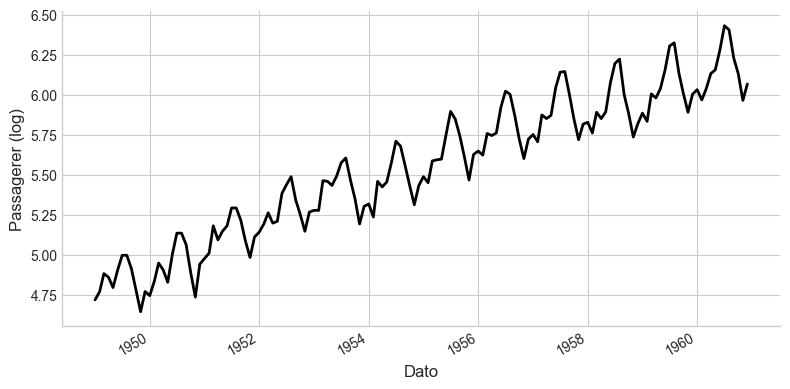

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- beregn log-transform ---------------------------------------------------
data["Passenger_Log"] = np.log(data["#Passengers"])

# --- plotfunktion ----------------------------------------------------------
def plot_passenger_log(df,
                       x_col="Month",
                       y_col="Passenger_Log",
                       title="",
                       x_label="Dato",
                       y_label="Passagerer (log)"):
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    fig, ax = plt.subplots(figsize=(8, 4))

    # sort linje som i de andre plots
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # kosmetik
    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# --- brug funktionen -------------------------------------------------------
plot_passenger_log(data)

The fluctuations are now on a consistent scale, but there is still a trend. Therefore, we now again have to apply the difference transform.

## Logarithm and Differenc Transform

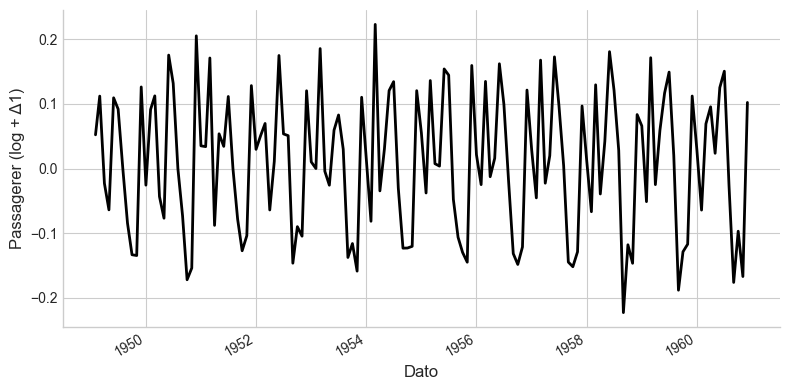

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- log + 1. differens -----------------------------------------------------
# (skip these two lines if du allerede har kolonnerne)
data["Passenger_Log"]      = np.log(data["#Passengers"])
data["Passenger_Diff_Log"] = data["Passenger_Log"].diff()

# --- plotfunktion ----------------------------------------------------------
def plot_passenger_logdiff(df,
                           x_col="Month",
                           y_col="Passenger_Diff_Log",
                           title="",
                           x_label="Dato",
                           y_label="Passagerer (log + Δ1)"):
    df = df.copy()
    df[x_col] = pd.to_datetime(df[x_col])

    fig, ax = plt.subplots(figsize=(8, 4))

    # hovedserie i sort for konsistent stil
    ax.plot(df[x_col], df[y_col], color="black", lw=2)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # kosmetik
    ax.spines[["top", "right"]].set_visible(False)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# --- brug funktionen -------------------------------------------------------
plot_passenger_logdiff(data)


Is the data now stationary? Yes!

As we can see, the mean and variance is now constant and has no long term trend.

## Stationarity Test

There are more quantitative techniques to determine if the data is indeed stationary.

One such method is the Augmented Dickey-Fuller (ADF) test. This is a statistical hypothesis test where the null hypothesis is the series is non-stationary (also known as a unit root test).

In [8]:
# ADF test
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))


adf_test(data["Passenger_Diff_Log"][1:])

ADF Statistic:  -2.7171305983881386
P-Value:  0.07112054815085783
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


The ADF P-value (7.1%) is in-between the 5% and 10%, so depending on where you set your significance level we either reject or fail to reject the null hypothesis.

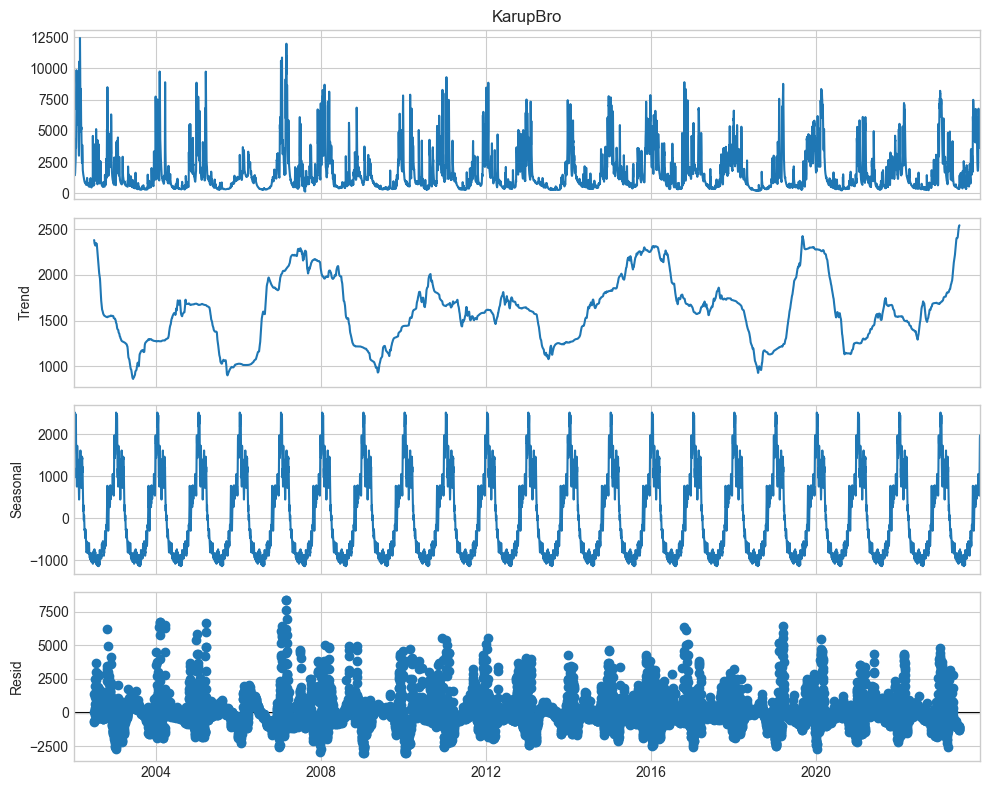

→ ORIGINAL series (with trend):
ADF(reg='ct')  stat = -8.446, p-value = 0.00000
KPSS(reg='ct') stat = 0.030, p-value = 0.10000, lags = 51

→ Deseasoned + 1st-differenced:
ADF(reg='ct')  stat = -20.850, p-value = 0.00000
KPSS(reg='ct') stat = 0.007, p-value = 0.10000, lags = 102

→ Log + Deseason + 1st-differenced:
ADF(reg='ct')  stat = -26.033, p-value = 0.00000
KPSS(reg='ct') stat = 0.006, p-value = 0.10000, lags = 75


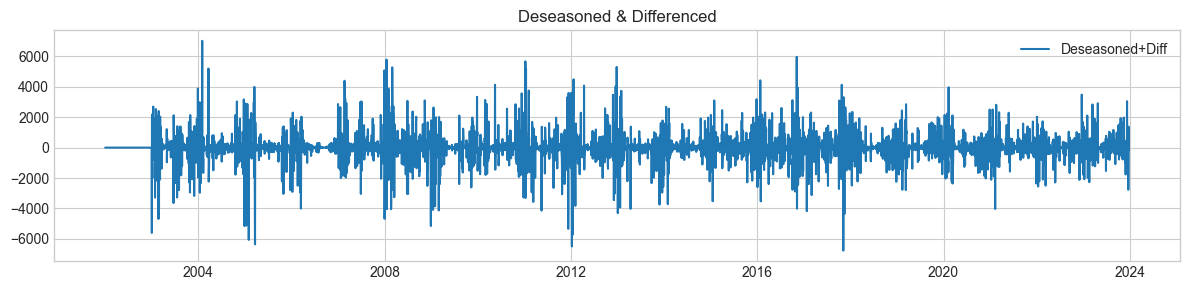

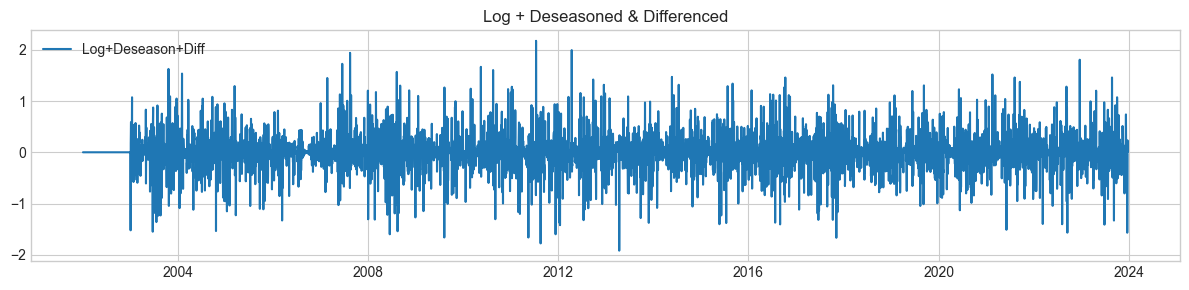

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# 0) suppress warnings
warnings.filterwarnings("ignore")

# 1) Load & clean
df = (
    pd.read_csv(
        "../Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated_ET0.csv",
        parse_dates=['time']
    )
    .set_index('time')
)
df.loc[df['temp_mean_daily'] > 35, 'temp_mean_daily'] = np.nan
df['temp_mean_daily'].interpolate(inplace=True)
df.loc[df['precip_total_daily'] > 100, 'precip_total_daily'] = np.nan
df['precip_total_daily'].fillna(0, inplace=True)

y = df['KarupBro']

# 2) Define ε and updated test functions
epsilon = 1e-6

def prepare(series):
    """Replace NaNs and zeros with ε, return numpy array."""
    s = series.copy().astype(float)
    s = s.fillna(epsilon).replace(0, epsilon)
    return s.values

def adf_test(series, regression='ct'):
    x = prepare(series)
    stat, pval, *_ = adfuller(x, regression=regression)
    print(f"ADF(reg='{regression}')  stat = {stat:.3f}, p-value = {pval:.5f}")

def kpss_test(series, regression='ct', nlags='auto'):
    x = prepare(series)
    stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
    print(f"KPSS(reg='{regression}') stat = {stat:.3f}, p-value = {pval:.5f}, lags = {lags}")

# 3) Decompose and plot
decomp = seasonal_decompose(y.dropna(), model='additive', period=365)
fig = decomp.plot(); fig.set_size_inches(10, 8)
plt.tight_layout(); plt.show()

# 4) Original series (with trend)
print("→ ORIGINAL series (with trend):")
adf_test(y, regression='ct')
kpss_test(y, regression='ct')

# 5) Deseason + diff
y_seasdiff   = y.diff(365)
y_deseasoned = y_seasdiff.diff()

print("\n→ Deseasoned + 1st-differenced:")
adf_test(y_deseasoned, regression='ct')
kpss_test(y_deseasoned, regression='ct')

# 6) Log + deseason + diff
y_log     = np.log(y.fillna(epsilon) + epsilon)
y_ls      = y_log.diff(365)
y_log_ds  = y_ls.diff()

print("\n→ Log + Deseason + 1st-differenced:")
adf_test(y_log_ds, regression='ct')
kpss_test(y_log_ds, regression='ct')

# 7) Quick sanity plots of transformed series
plt.figure(figsize=(12,3))
plt.plot(y_deseasoned.fillna(epsilon), label='Deseasoned+Diff')
plt.title("Deseasoned & Differenced"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3))
plt.plot(y_log_ds.fillna(epsilon), label='Log+Deseason+Diff')
plt.title("Log + Deseasoned & Differenced"); plt.legend(); plt.tight_layout(); plt.show()

In [17]:
import numpy as np
from statsmodels.tsa.stattools import kpss

def bootstrap_kpss(x, B=1000, regression='ct', nlags='auto'):
    obs_stat, _, _, _ = kpss(x, regression=regression, nlags=nlags)
    n = len(x)
    stats = []
    for _ in range(B):
        # generate a random walk under H₀ of stationarity: white noise
        sim = np.random.normal(size=n)
        stat, *_ = kpss(sim, regression=regression, nlags=nlags)
        stats.append(stat)
    stats = np.array(stats)
    # p = fraction of sims with KPSS ≥ observed
    return obs_stat, np.mean(stats >= obs_stat)

# usage
y_clean = prepare(y_deseasoned)  # your stationary series
obs, p_boot = bootstrap_kpss(y_clean, B=2000)
print(f"Observed KPSS = {obs:.3f}, bootstrapped p ≈ {p_boot:.4f}")

Observed KPSS = 0.007, bootstrapped p ≈ 1.0000
